  
<h1>Projeto 2: Análise de Aluguel de Bicicletas em Seoul, Coréia do Sul</h1>

<h2>Introdução</h2>

<p>Bem-vindo ao Projeto 2, onde exploramos o mundo das bicicletas em Seoul, Coréia do Sul. Nosso objetivo é modelar e prever a quantidade de bicicletas alugadas com base em uma variedade de fatores climáticos, incluindo temperatura, umidade e outros indicadores meteorológicos diários.</p>

<p>Neste estudo, consideramos um conjunto de variáveis independentes que abrangem aspectos como data, hora, condições climáticas, sazonalidade e eventos especiais. Todas essas variáveis desempenham um papel vital na previsão do número de bicicletas alugadas em Seoul.</p>

<h2>Variáveis Independentes</h2>

<ul>
    <li><strong>Date</strong>: Data do registro</li>
    <li><strong>Hour</strong>: Hora do dia</li>
    <li><strong>Temperature (°C)</strong>: Temperatura em graus Celsius</li>
    <li><strong>Humidity (%)</strong>: Umidade relativa em porcentagem</li>
    <li><strong>Wind Speed (m/s)</strong>: Velocidade do vento em metros por segundo</li>
    <li><strong>Visibility (10m)</strong>: Visibilidade em 10 metros</li>
    <li><strong>Dew Point Temperature (°C)</strong>: Temperatura de ponto de orvalho em graus Celsius</li>
    <li><strong>Solar Radiation (MJ/m2)</strong>: Radiação solar em Megajoules por metro quadrado</li>
    <li><strong>Rainfall (mm)</strong>: Precipitação em milímetros</li>
    <li><strong>Snowfall (cm)</strong>: Acúmulo de neve em centímetros</li>
    <li><strong>Seasons</strong>: Estação do ano (Primavera, Verão, Outono, Inverno)</li>
    <li><strong>Holiday</strong>: Indicador de dia de feriado</li>
    <li><strong>Functioning Day</strong>: Indicador de funcionamento do sistema de aluguel</li>
</ul>

<h2>Variável Dependente</h2>

<ul>
    <li><strong>Rented Bike Count</strong>: A quantidade de bicicletas alugadas</li>
</ul>

<p>Este projeto visa explorar a relação entre essas variáveis independentes e a variável dependente, proporcionando insights valiosos sobre o comportamento de aluguel de bicicletas em Seoul. Através da análise e modelagem de dados, buscamos entender os padrões de uso das bicicletas na cidade e aprimorar nossa capacidade de prever a demanda futura.</p>

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [4]:
list(df)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [5]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df['Rented Bike Count'].value_counts(sort=True)

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [7]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

<h2>Limpeza da base de dados</h2>

In [8]:
#Verificando se o dataset possui valores nulos
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Assim, podemos verificar que não temos valores nulos ou ausentes, portanto, podemos dar continuidade análise exploratória.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


<h3>Selecionando os features mais relevantes</h3>
    <p>Para otimizar nosso estudo, é crucial direcionar nossa atenção para as colunas (features) mais impactantes na previsão do diagnóstico do paciente. Realizaremos uma análise minuciosa da relevância de cada feature, atribuindo a cada uma um score que reflete sua contribuição para a classificação. Ao avaliar esses scores, teremos a capacidade de descartar as features menos relevantes, concentrando assim nosso foco nas variáveis que exercem maior influência na determinação do diagnóstico. Esse processo seletivo nos permitirá aprimorar a precisão de nossa modelagem, destacando os elementos cruciais para uma previsão eficaz</p>

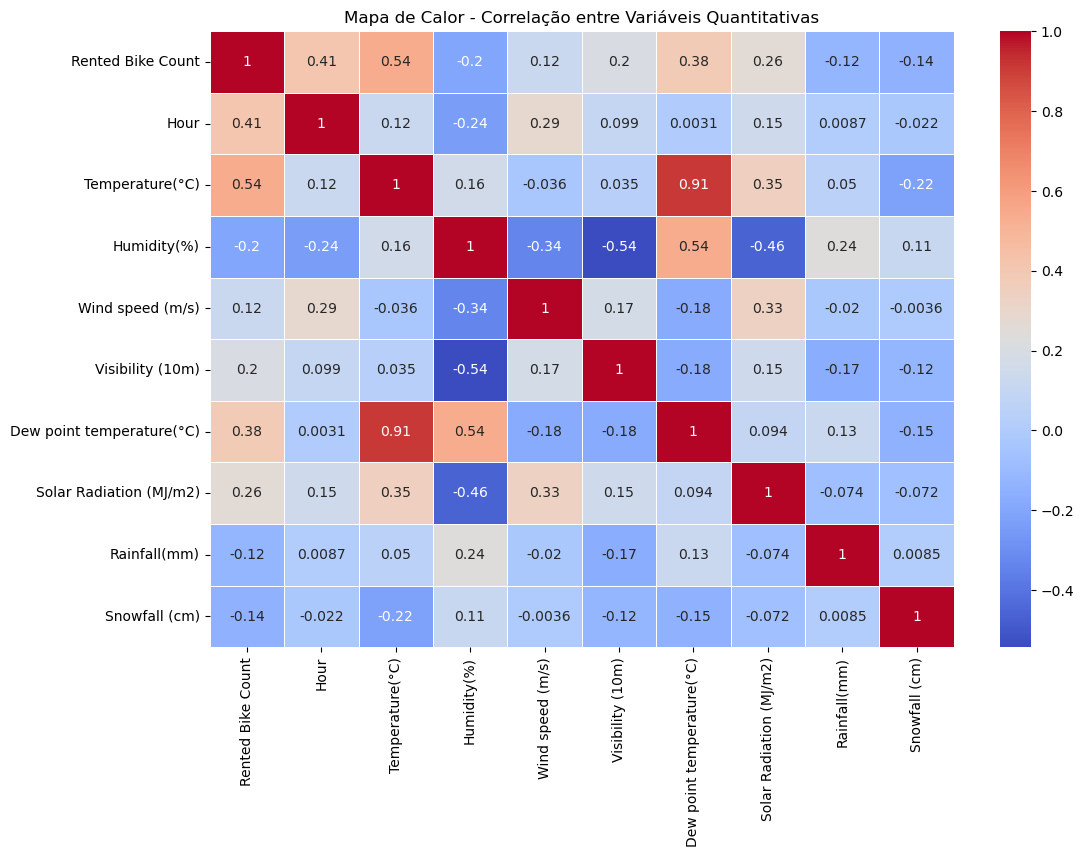

In [11]:
# Selecione apenas as variáveis quantitativas
variaveis_quantitativas = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(variaveis_quantitativas.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis Quantitativas')
plt.show()

Portanto, com o intuito de reduzir a dimensionalidade podemos retirar a coluna:

<ul>
    <li><strong>Dew point temperature(°C)</strong>: Temperatura de ponto de orvalho em graus Celsius</li>
</ul>

In [12]:
df = df.drop(['Dew point temperature(°C)'], axis=1)

In [13]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


<h2>Início da Análise Exploratória</h2>

<h2>Divisão em Treino e Teste</h2>

<h3>Criando variáveis Dummy</h3>

#### A Necessidade de Variáveis Dummy

A necessidade de criar variáveis dummy surge quando lidamos com variáveis categóricas em um contexto de análise de dados ou modelagem estatística. As variáveis categóricas são aquelas que representam categorias ou grupos e não têm uma relação numérica natural entre elas.

Alguns algoritmos de machine learning e técnicas estatísticas requerem que todas as entradas sejam numéricas. Variáveis categóricas, como nomes de cidades, tipos de produtos ou categorias de cores, precisam ser convertidas em um formato numérico para serem utilizadas efetivamente em tais métodos. A criação de variáveis dummy é uma técnica comum para realizar essa conversão.

Aqui estão algumas razões para a criação de variáveis dummy:

- **Compatibilidade com Algoritmos Numéricos:** Muitos algoritmos de machine learning, como regressão linear, árvores de decisão e redes neurais, operam com entradas numéricas. Ao criar variáveis dummy, transformamos informações categóricas em representações numéricas, permitindo que esses algoritmos compreendam e usem essas características.

- **Evitar Viés Numérico:** Ao atribuir números a categorias, não queremos criar uma implicação de ordem ou magnitude que não existe nas variáveis categóricas. Variáveis dummy evitam esse viés ao representar cada categoria como uma variável binária (0 ou 1), indicando a presença ou ausência da categoria.

- **Melhorar a Interpretação:** A utilização de variáveis dummy pode facilitar a interpretação dos resultados do modelo. Cada variável dummy representa claramente a presença ou ausência de uma categoria específica, tornando os resultados mais compreensíveis e interpretáveis.

- **Evitar Suposições Errôneas:** Algoritmos que assumem uma relação ordinal ou contínua entre categorias podem levar a interpretações errôneas quando aplicados a variáveis categóricas. A criação de variáveis dummy ajuda a evitar essas suposições inadequadas.

Em resumo, criar variáveis dummy é uma prática importante ao lidar com variáveis categóricas para garantir que os modelos de machine learning ou análises estatísticas possam utilizar efetivamente essas informações sem introduzir distorções ou viés nos resultados.


In [ ]:
# Transformação em dummy
#hora = pd.get_dummies(df['Hour'], prefix='Hour')
# Concatenar os dados dummy com o DataFrame original
#df = pd.concat([df, hora], axis=1)
#hora